In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240328_NBFF_GRU_Final/n=3 max_epochs=1500 seed=0/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)

path_NODE_Sweep = pathTT + "20240410_NBFF_NODE_DT_LatentSweep_new/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

/home/csverst/Github/CtDBenchmark/


In [3]:
print(len(subfolders_NODE))

16


In [4]:
comparison = Comparison(comparison_tag="Figure2")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")
for subfolder in subfolders_NODE:
    latent_size = int(subfolder.split(" ")[-1].split("=")[-1])
    print(latent_size)
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = f"NODE_{latent_size}", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = f"NODE_{latent_size}")

comparison.regroup()
print(comparison.groups)

10
8
5
3
8
8
8
3
10
10
5
3
3
5
5
10
['NODE_10' 'NODE_10' 'NODE_10' 'NODE_10' 'NODE_3' 'NODE_3' 'NODE_3'
 'NODE_3' 'NODE_5' 'NODE_5' 'NODE_5' 'NODE_5' 'NODE_8' 'NODE_8' 'NODE_8'
 'NODE_8' 'TT']


In [5]:
rate_state = comparison.compare_rate_state_r2()

AttributeError: 'GRU_RNN' object has no attribute 'latent_ic_var'

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HA

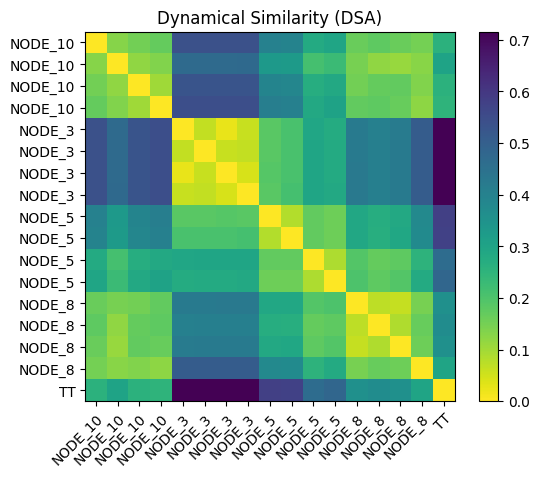

In [ ]:

sims = comparison.compare_dynamics_DSA()


ValueError: The number of FixedLocator locations (288), usually from a call to set_ticks, does not match the number of labels (3).

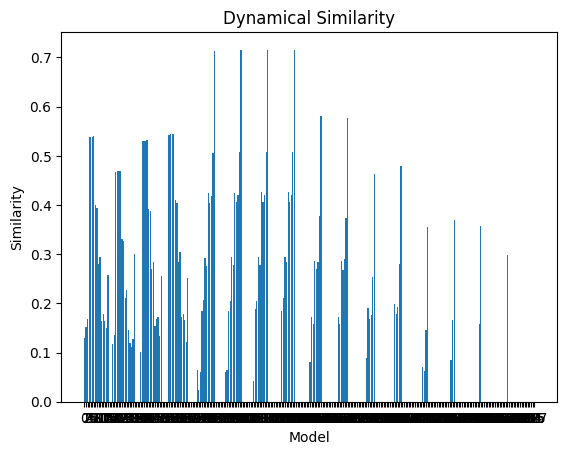

In [ ]:
# Take upper triangle of sims
sims = np.triu(sims, k=0)
sims = sims.flatten()
self_sim = sims[0]
sims = sims[1:]
fig = plt.figure()
plt.bar(range(len(sims)), sims)
plt.title("Dynamical Similarity")
plt.xlabel("Model")
plt.ylabel("Similarity")
plt.xticks(range(len(sims)), ["GRU", "Vanilla", "NODE"])    

comparison.compare_to_reference_affine